# Analysis

In [1]:
import os

import pandas as pd
import torch
from torchvision.transforms import transforms as T

from dogs_cats_classifier.data import DogsCatsImagesDataModule
from dogs_cats_classifier.utils import Evaluator

# Setting

In [2]:
dataset_root = '../datasets/final/train'
batch_size = 16
num_workers = os.cpu_count() // 4
image_size = (256, 256)
seed = 168
model_path = '../model_weights/swin_b_2022-10-31_21-15-13/model.pt'
output_path = '../reports/'

# Prepare Dataset

In [3]:
test_t = T.Compose([
    T.Resize(image_size),
    T.ToTensor(),
])
datamodule = DogsCatsImagesDataModule(
    root=dataset_root,
    batch_size=batch_size,
    num_workers=num_workers,
    train_transforms=test_t,
    test_transforms=test_t,
    val_transforms=test_t,
    random_seed=seed,
)
datamodule.setup(stage='test')

In [4]:
model = torch.jit.load(model_path)

# Use Evaluator

In [5]:
evaluator = Evaluator(model=model, output_path=output_path)

In [6]:
def evaluation_wrap(dataloader, filenames, title):
    ground_truth, predictions, class_predictions = evaluator.evaluate(dataloader, title=title)
    df = zip(filenames, ground_truth, predictions, class_predictions)
    df = pd.DataFrame(df, columns=['filename', 'ground_truth', 'prediction', 'class_predictions'])
    df_wrong = df[df['ground_truth'] != df['class_predictions']]
    print(df_wrong)
    evaluator.plot_images(df_wrong, title='test', output_path=output_path,
                          verbose=True)


  0%|          | 1/1250 [00:14<5:06:28, 14.72s/it]C:\anaconda3\envs\dogs-cats-classifier\lib\site-packages\torch\nn\modules\module.py:1130: UserWarning: operator () profile_node %319 : int[] = prim::profile_ivalue(%317)
 does not have profile information (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\jit\codegen\cuda\graph_fuser.cpp:108.)
  return forward_call(*input, **kwargs)
100%|██████████| 1250/1250 [03:00<00:00,  6.93it/s]


Title: train
Accuracy: 0.9962
Precision: 0.9945208208806535
Recall: 0.9979008396641343
AUC: 0.9996312799410049
                                    filename  ground_truth  prediction  \
623     ..\datasets\final\train\dog.4874.jpg             1    0.404468   
938    ..\datasets\final\train\cat.10532.jpg             0    0.546877   
1444    ..\datasets\final\train\dog.8013.jpg             1    0.468230   
1591     ..\datasets\final\train\cat.724.jpg             0    0.996034   
1860    ..\datasets\final\train\cat.8647.jpg             0    0.738769   
...                                      ...           ...         ...   
19052    ..\datasets\final\train\cat.245.jpg             0    0.620709   
19308   ..\datasets\final\train\cat.8456.jpg             0    0.737619   
19364   ..\datasets\final\train\cat.6655.jpg             0    0.807238   
19439   ..\datasets\final\train\cat.2150.jpg             0    0.787939   
19990  ..\datasets\final\train\dog.10179.jpg             1    0.257988   



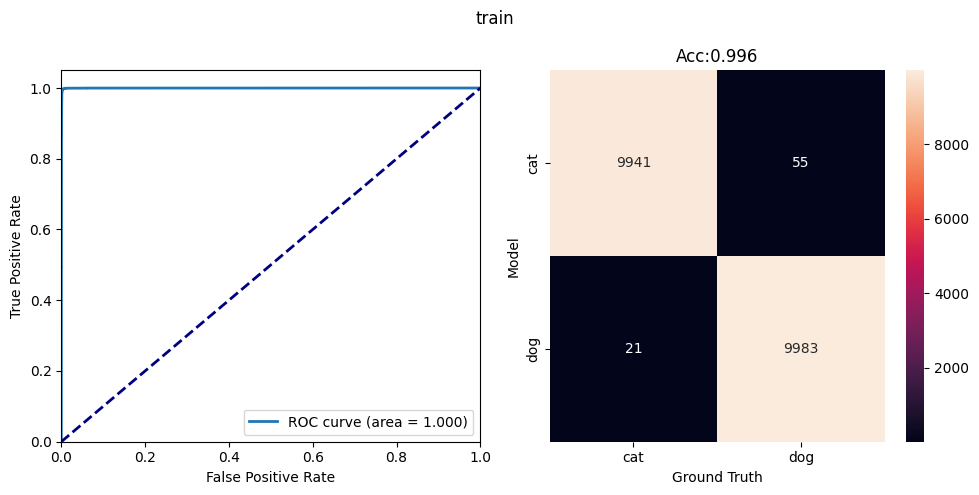

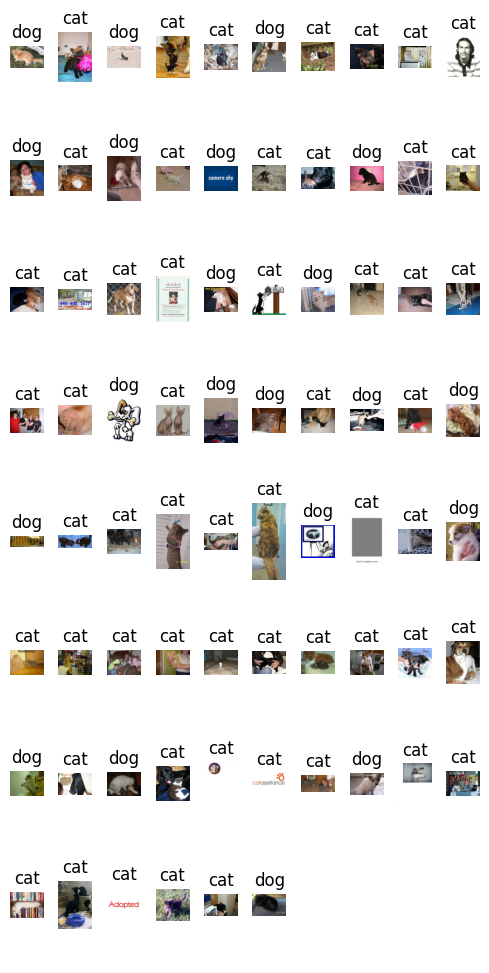

In [7]:
evaluation_wrap(datamodule.train_dataloader(), datamodule.train_image_filenames, 'train')

100%|██████████| 157/157 [00:26<00:00,  6.03it/s]


Title: val
Accuracy: 0.9948
Precision: 0.9913249211356467
Recall: 0.9984114376489277
AUC: 0.9998291111411215
                                   filename  ground_truth  prediction  \
673    ..\datasets\final\train\cat.5241.jpg             0    0.753736   
759    ..\datasets\final\train\cat.2893.jpg             0    0.551003   
789    ..\datasets\final\train\cat.7194.jpg             0    0.986101   
814    ..\datasets\final\train\cat.9090.jpg             0    0.565094   
1069  ..\datasets\final\train\cat.11724.jpg             0    0.906947   
1313   ..\datasets\final\train\cat.6051.jpg             0    0.607517   
1340   ..\datasets\final\train\dog.9149.jpg             1    0.383489   
1401   ..\datasets\final\train\dog.8958.jpg             1    0.263686   
1416   ..\datasets\final\train\cat.6734.jpg             0    0.719378   
1843   ..\datasets\final\train\cat.3731.jpg             0    0.756215   
2134   ..\datasets\final\train\cat.8504.jpg             0    0.782181   
2229   ..\datas

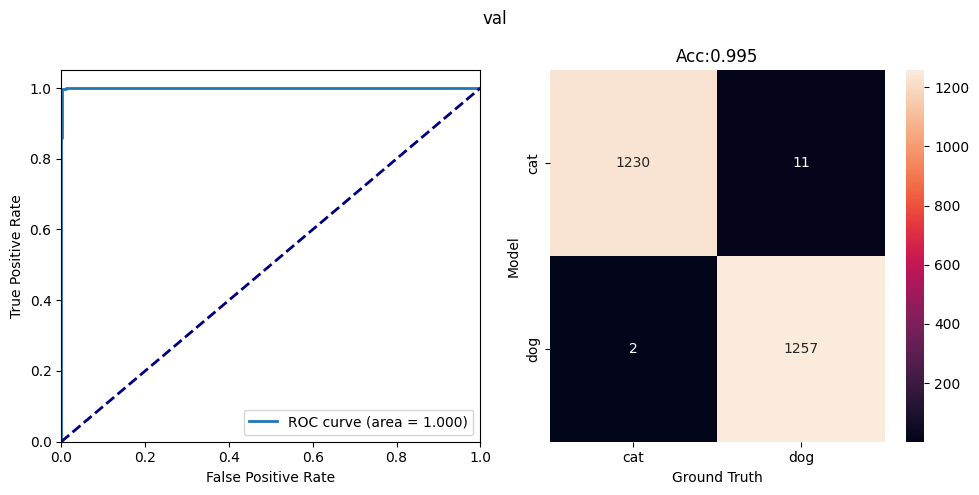

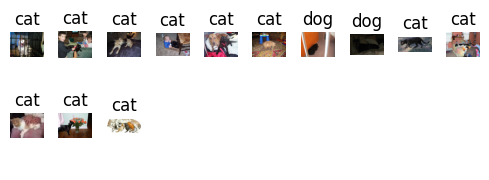

In [8]:
evaluation_wrap(datamodule.val_dataloader(), datamodule.val_image_filenames, 'val')

100%|██████████| 157/157 [00:26<00:00,  5.89it/s]


Title: test
Accuracy: 0.9976
Precision: 0.9959709911361805
Recall: 0.9991915925626516
AUC: 0.9999385533539308
                                   filename  ground_truth  prediction  \
199    ..\datasets\final\train\cat.3868.jpg             0    0.858241   
602    ..\datasets\final\train\dog.7265.jpg             1    0.193701   
823    ..\datasets\final\train\cat.9171.jpg             0    0.701268   
1441   ..\datasets\final\train\cat.7599.jpg             0    0.958631   
1504  ..\datasets\final\train\cat.12476.jpg             0    0.512521   
2286   ..\datasets\final\train\cat.5583.jpg             0    0.962364   

      class_predictions  
199                   1  
602                   0  
823                   1  
1441                  1  
1504                  1  
2286                  1  


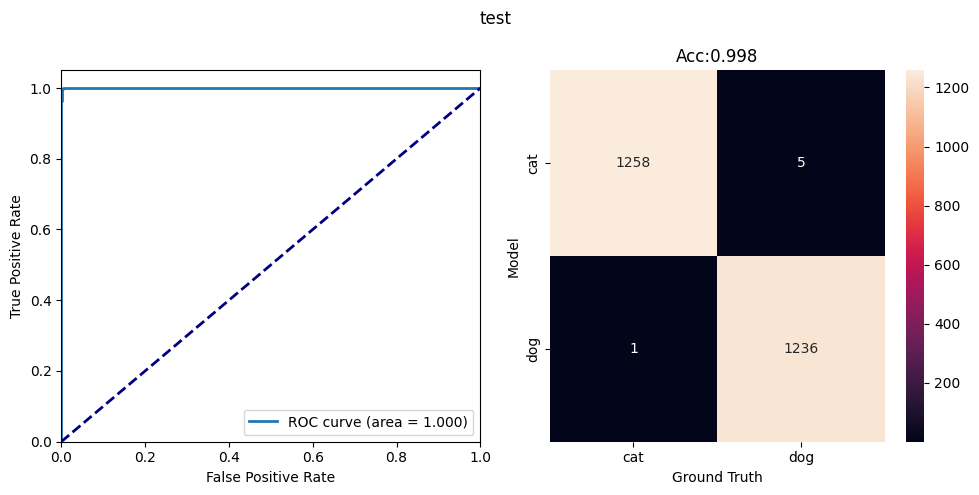

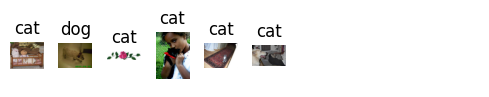

In [9]:
evaluation_wrap(datamodule.test_dataloader(), datamodule.test_image_filenames, 'test')